In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd

In [2]:

weather_filename = "180614_weather_data.csv"
weather_file = open(weather_filename)
weather_data = weather_file.read()
weather_file.close()

In [3]:
print(len(weather_data))

1636067


In [4]:
print(weather_data[:200])

STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-01,,0.03,,51,36
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-02,,0.25,,49,41
USW0


In [5]:
lines = weather_data.split('\n')
print(len(lines))
for i in range(5):
    print(lines[i])

21342
STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-01,,0.03,,51,36
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-02,,0.25,,49,41
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-03,,0,,41,30
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-04,,0,,39,34


In [6]:
labels = lines[0]
values = lines[1:]
n_values = len(values)
#print(labels)
for i in range(10):
    print(values[i])

USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-01,,0.03,,51,36
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-02,,0.25,,49,41
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-03,,0,,41,30
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-04,,0,,39,34
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-05,,0.76,,36,32
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-06,,0.02,,34,31
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-07,,0,,35,31
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-08,,0,,46,27
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-09,,0,,60,31
USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1960-01-10,,0,,60,50


In [7]:
year = []
month = []
day = []
date = []
max_temp = []
j_date = 3
j_max_temp = 7

date[:] = [i.replace('"', "") for i in date]
j_day = 2
j_month = 1
j_year = 0
n_date = len(date)
date_values = date[0:]
#print date_values
for dates in range(n_date):
    #print dates
    split_date = date_values[dates].split('-')
    #print(split_date)
    #print split_date
    year.append(int(split_date[j_year]))
    month.append(int(split_date[j_month]))
    day.append(int(split_date[j_day]))

for i_row in range(n_values):
    split_values = values[i_row].split(',')
    split_values[:] = [i.replace('"', "") for i in split_values]
    #print(split_values)
    try: 
        if len(split_values) >= j_max_temp:
        #print len(split_values[j_max_temp])
            date.append(split_values[j_date])
            max_temp.append(float(split_values[j_max_temp]))
    except ValueError as e: 
        print i_row
#for i_day in range(100):
    #print(max_temp[i_day])

print len(max_temp)

21341


In [8]:

date[:] = [i.replace('"', "") for i in date]
j_day = 2
j_month = 1
j_year = 0
n_date = len(date)
date_values = date[0:]
#print date_values
for dates in range(n_date):
    #print dates
    split_date = date_values[dates].split('-')
    #print(split_date)
    #print split_date
    year.append(int(split_date[j_year]))
    month.append(int(split_date[j_month]))
    day.append(int(split_date[j_day]))
    

for dates in range(100):
    print(day[dates])

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1
2
3
4
5
6
7
8
9


In [9]:
print(date[:20])

['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10', '1960-01-11', '1960-01-12', '1960-01-13', '1960-01-14', '1960-01-15', '1960-01-16', '1960-01-17', '1960-01-18', '1960-01-19', '1960-01-20']


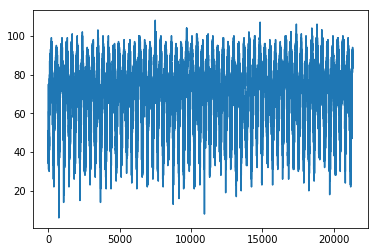

In [10]:
plt.plot(max_temp)
plt.show()

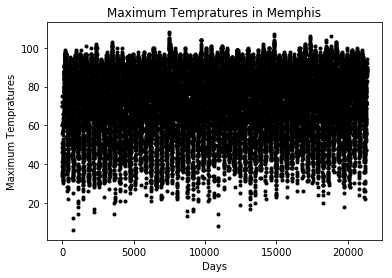

In [16]:

warnings.simplefilter(action='ignore', category=FutureWarning)
temps = np.array(max_temp)
temps[np.where(temps == "")] = np.nan

plt.plot(temps, color='black', marker='.', linestyle='none')
plt.title('Maximum Tempratures in Memphis')
plt.ylabel('Maximum Tempratures')
plt.xlabel('Days')
plt.show()

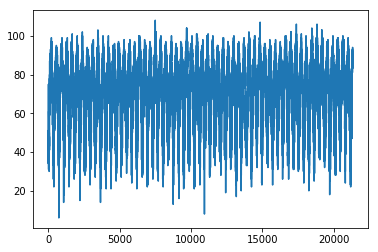

In [34]:
i_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[i_start:]
year = year[i_start:]
month = month[i_start:]
day = day[i_start:]
i_nans = np.where(np.isnan(temps))[0]

for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i - 1]
        
plt.plot(temps)
plt.show()

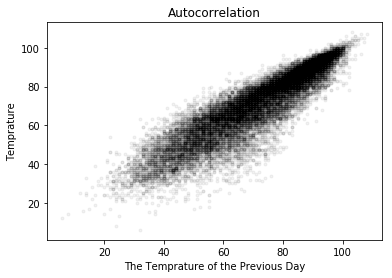

In [19]:
#print(np.where(np.isnan(temps))[0])
plt.plot(temps[:-1], temps[1:], color='black', marker='.', linestyle='none', alpha=.05,)
plt.title('Autocorrelation')
plt.ylabel('Temprature')
plt.xlabel('The Temprature of the Previous Day')
plt.show()

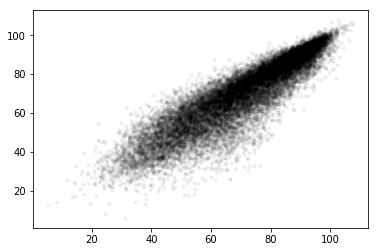

In [36]:
def scatter(x, y):
    x_jitter = x + np.random.normal(size=x.size, scale=.5)
    y_jitter = y + np.random.normal(size=x.size, scale=.5)
    plt.plot(x_jitter, y_jitter, color='black', marker='.', linestyle='none', alpha=.05,)
    plt.show()

shift = 1
scatter(temps[:-shift], temps[shift:])    

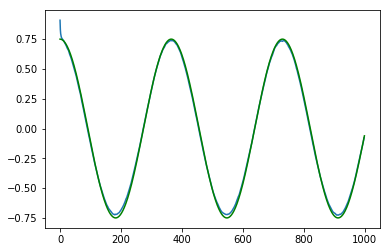

In [37]:
autocorr = []
for shift in range(1, 1000):
    correlation = np.corrcoef(temps[:-shift], temps[shift:])[1, 0]
    autocorr.append(correlation)
    
plt.plot(autocorr)
d = np.arange(1000)
fit = .75 * np.cos(2 * np.pi * d / 365)
plt.plot(d, fit, color='green')
plt.show()

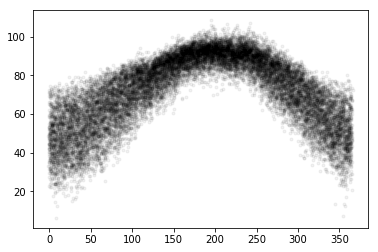

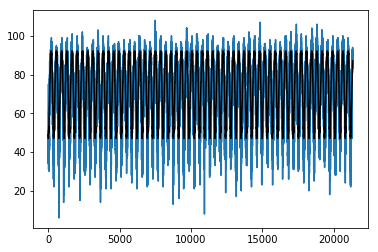

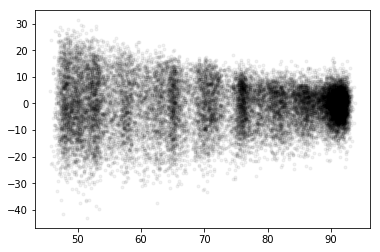

In [38]:
#np.warnings.filterwarnings('ignore')
def find_day_of_year(year, month, day):
    days_per_month = np.array([
        31, #January
        28, #February
        31, #March
        30, #April
        31, #May
        30, #June
        31, #July
        31, #August
        30, #September
        31, #October
        30, #November
        31, #December
    ])
    if year % 4 == 0:
        days_per_month[1] += 1
    day_of_year = np.sum(np.array(days_per_month[:month - 1])) + day - 1
    return day_of_year

day_of_year = np.zeros(temps.size)
for i_row in range(temps.size):
    day_of_year[i_row] = find_day_of_year(year[i_row], month[i_row], day[i_row])

scatter(day_of_year, temps)    

median_temp_calendar = np.zeros(366)
ten_day_medians = np.zeros(temps.size)
for i_day in range(0, 365):
    low_day = i_day - 5     
    high_day = i_day + 4
    #print low_day
    
    if low_day < 0:
        low_day += 365
    
    if high_day > 365:
        high_day += -365
    
    if low_day < high_day:
            i_window_days = np.where(np.logical_and(day_of_year >= low_day, day_of_year <= high_day))
            
    else:
        i_window_days = np.where(np.logical_or(day_of_year >= low_day, day_of_year <= high_day))
    
    ten_day_median = np.median(temps[i_window_days])
    median_temp_calendar[i_day] = ten_day_median
    ten_day_medians[np.where(day_of_year == i_day)] = ten_day_median
    
    
    if i_day == 364:
        ten_day_medians[np.where(day_of_year == 365)] = ten_day_median
        median_temp_calendar[365] = ten_day_median
    #print(i_day, low_day, high_day, i_window_days[0].size)
        
        
#print(ten_day_medians.size, np.unique(ten_day_medians), ten_day_medians)

plt.plot(temps)
plt.plot(ten_day_medians, color='black')
plt.show()
scatter(ten_day_medians, temps - ten_day_medians)

In [310]:
find_day_of_year(2017, 6, 11)

161

In [313]:
def predict(day, month, year, temperature_calendar):   
    doy = find_day_of_year(year, month, day)
    #print doy
    prediction = temperature_calendar[doy]
    return prediction
#print len(median_temp_calendar)

for test_day in range(1, 30):    
    test_year = 2018
    test_month = 6
    prediction = predict(test_day, test_month, test_year, median_temp_calendar)
    print(test_year, test_month, test_day, prediction)

(2018, 6, 1, 87.0)
(2018, 6, 2, 87.0)
(2018, 6, 3, 87.0)
(2018, 6, 4, 87.0)
(2018, 6, 5, 88.0)
(2018, 6, 6, 88.0)
(2018, 6, 7, 88.0)
(2018, 6, 8, 89.0)
(2018, 6, 9, 89.0)
(2018, 6, 10, 89.0)
(2018, 6, 11, 89.0)
(2018, 6, 12, 90.0)
(2018, 6, 13, 90.0)
(2018, 6, 14, 90.0)
(2018, 6, 15, 90.0)
(2018, 6, 16, 91.0)
(2018, 6, 17, 91.0)
(2018, 6, 18, 91.0)
(2018, 6, 19, 91.0)
(2018, 6, 20, 91.0)
(2018, 6, 21, 91.0)
(2018, 6, 22, 91.0)
(2018, 6, 23, 91.0)
(2018, 6, 24, 91.0)
(2018, 6, 25, 91.0)
(2018, 6, 26, 91.0)
(2018, 6, 27, 91.0)
(2018, 6, 28, 91.0)
(2018, 6, 29, 91.0)


<bound method DataFrame.sum of          0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
...    ...
10228  0.0
10229  0.0
10230  0.0
10231  0.0
10232  0.0
10233  0.0
10234  0.0
10235  0.0
10236  0.0
10237  0.0
10238  0.0
10239  0.0
10240  0.0
10241  0.0
10242  0.0
10243  0.0
10244  0.0
10245  0.0
10246  0.0
10247  0.0
10248  0.0
10249  0.0
10250  0.0
10251  0.0
10252  0.0
10253  0.0
10254  0.0
10255  0.0
10256  0.0
10257  0.0

[10258 rows x 1 columns]>